In [55]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import wandb

In [2]:
api = wandb.Api()
run = api.run("krieg-team/Elissabeth Long Lookup 2/vi8fn5hw")

In [48]:
def get_metric(name: str) -> np.ndarray:
    return np.array([row[name] for row in run.scan_history(keys=[name])])

In [49]:
train_acc = get_metric("train/accuracy")
val_acc = get_metric("validation/accuracy")

train_loss = get_metric("train/loss")
val_loss = get_metric("validation/loss")

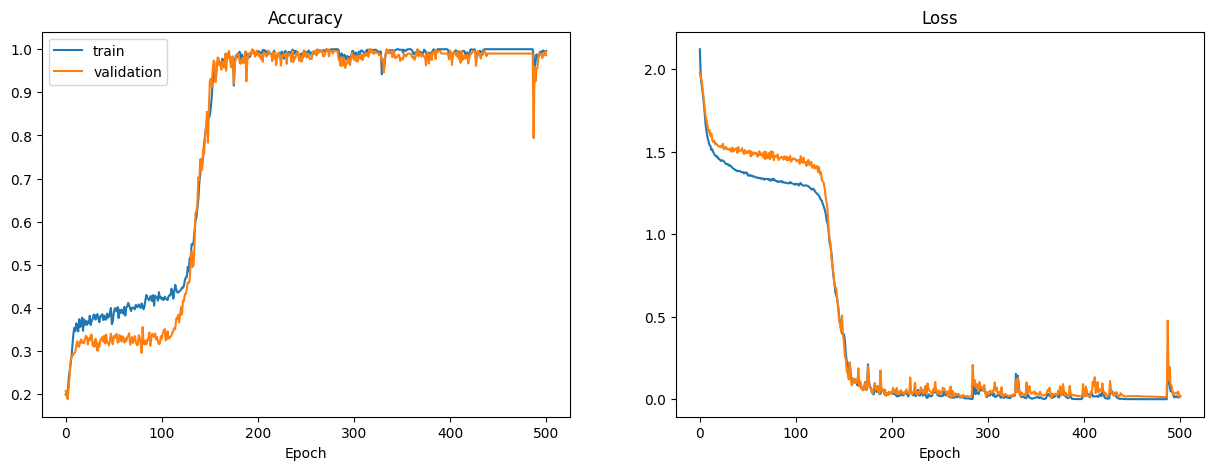

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(train_acc, "-", label="train")
ax[0].plot(val_acc, "-", label="validation")
ax[0].set_title("Accuracy")
ax[0].set_xlabel("Epoch")
ax[0].legend(loc="best")

ax[1].plot(train_loss, "-", label="train")
ax[1].plot(val_loss, "-", label="validation")
ax[1].set_title("Loss")
ax[1].set_xlabel("Epoch")

plt.savefig(
    Path.cwd() / "plot.pdf",
    bbox_inches="tight",
    facecolor=(0, 0, 0, 0),
)